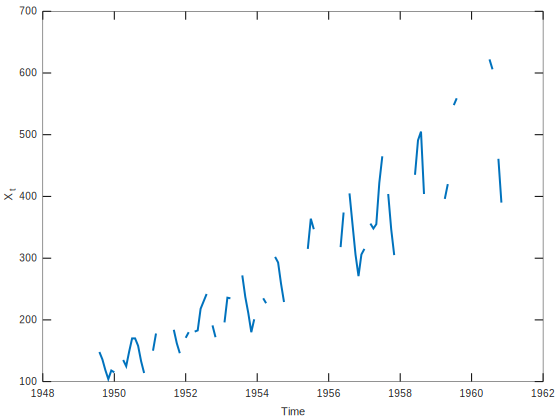

In [140]:
% reading csv file
csv_file = 'flights.csv';
Data = csvread(csv_file);

% define time and data
T = Data(:,1);
X = Data(:,2);

% replace 0s with NaN for discontinuous plotting
T_nan = T;
X_nan = X;
zero_ind = (X==0);
T_nan(zero_ind) = NaN;
X_nan(zero_ind) = NaN;

% plotting discontinuous figure
figure;
plot(T_nan,X_nan,'LineWidth',2);
xlabel('Time');
ylabel('X_t');

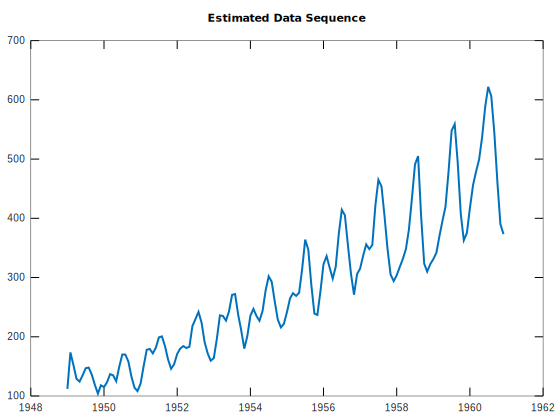

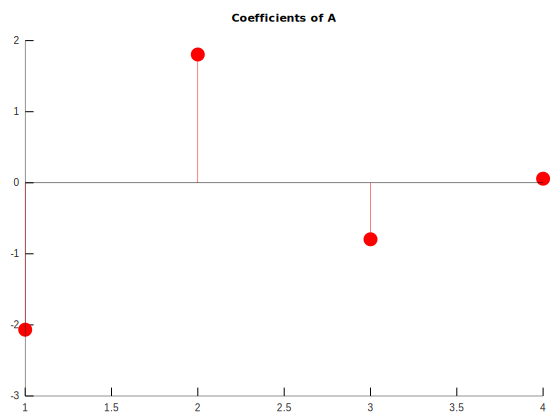

In [152]:
% number of iterations
E = 100;

% define N and M
M = 4;
[N,~] = size(X);

% define X_ob and X_hat
X_ob = X;
X_hat = X;

% define G_X and G_A
G_X = zeros(N-M, M);
G_A = zeros(N-M, N);

for i=1:E
    % construct G_X
    for j=1:M
        G_X(:,j) = X_hat(M-j+1:N-j,1);
    end 
    
    % define X_MN
    X_MN = X_hat(M+1:N,1);
    
    % solve for A
    A = G_X\X_MN;
    
    % construct G_A
    for j=1:N-M
        row = zeros(1,N);
        row(1,j:j+M) = [flipud(A)', -1];
        G_A(j,:) = row;
    end

    % solve for X_mi
    X_mi = G_A(:,zero_ind)\(-G_A*X_ob);

    % update X_hat
    X_hat = X_ob;
    X_hat(zero_ind) = X_mi;
end
figure;
plot(T(2:end),X_hat(2:end),'LineWidth',2);
title('Estimated Data Sequence');
figure;
stem(-A, 'r', 'filled');
title('Coefficients of A');